# Notebook: "uWF Rankings for countries/items" (task 3/5)
#### coded by Jörg (group13)

### The purpose

#### We set up general rankings of uWF for countries and food items incl. portion sizes to understand how most water can be saved by considering water-saving products for the buying decision of food items.

In [1]:
# load necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in uWF data, downloaded from watertofood.org 
path = "/home/jburdano/projects/uWF101/"
fil =  "watertofood_uWF-weight_15crops_15countries_1960-2016_5perc.csv"  
df = pd.read_csv(path+fil,) #, ";",header=1)
df = df.mask(df==0)    # set zero values to nan-values
del df["Unnamed: 0"]
display(df.shape)
df.head()

(10598, 6)

,Years,Item Name,Country Name,Item Category,Weight_t,uWF
0,1961,Apples,Austria,Fruits,456000.0,67.596703
1,1961,Apples,France,Fruits,2141999.0,314.213013
2,1961,Apples,Germany,Fruits,851001.0,147.557999
3,1961,Apples,Greece,Fruits,196000.0,1032.219971
4,1961,Apples,Hungary,Fruits,349500.0,793.695984


In [3]:
#plot settings
sns.set_theme(context='talk', style='whitegrid', font='sans-serif', 
              font_scale=.9, color_codes=True, rc=None)
#plt.style.use("fivethirtyeight")

## Rankings:

### 1. Time-average uWF per item (incl. portions)

,uWF,uWF_portion
Item Name,,
Tomatoes,125.2,12.520
Lettuce and chicory,156.1,78.050
Mushrooms and truffles,158.2,15.820
Cucumbers and gherkins,173.6,5.208
Carrots and turnips,176.0,17.600
"Chillies and peppers, green",182.2,36.440
Potatoes,218.4,21.840
"Pumpkins, squash and gourds",283.3,84.990
Apples,446.8,89.360


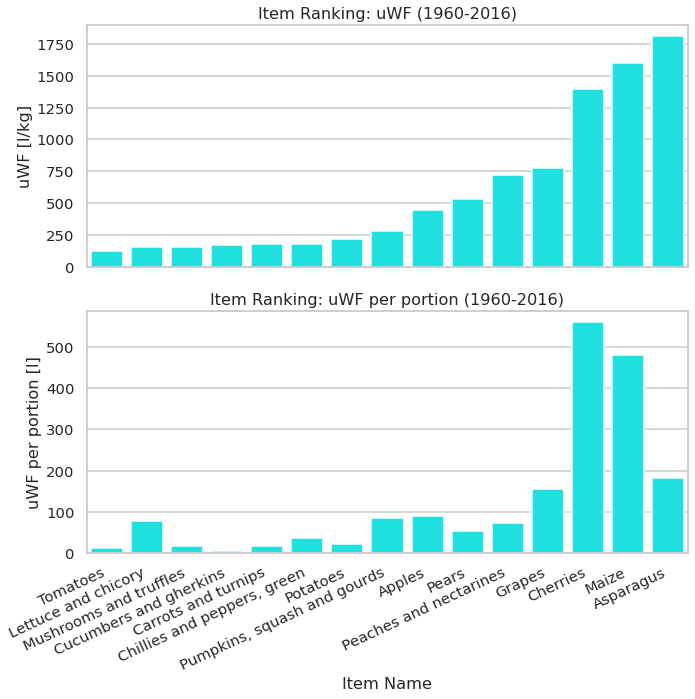

In [4]:
df_r_i = df.loc[:,["Item Name","uWF"]].groupby("Item Name").agg("mean").sort_values("uWF").round(1)
fig,ax = plt.subplots(2,figsize=[10,10])
ax[0] = sns.barplot(x=df_r_i.index, y="uWF", data=df_r_i,color="cyan",ax=ax[0]);
ax[0].set_xticklabels("");
ax[0].set(title="Item Ranking: uWF (1960-2016)",xlabel="",ylabel="uWF [l/kg]")

df_r_i["uWF_portion"]=df_r_i["uWF"]*[0.1,0.5,0.1,0.03,0.1,0.2,0.1,0.3,0.2,0.1,0.1,0.2,0.4,0.3,0.1]
ax[1] = sns.barplot(x=df_r_i.index, y="uWF_portion", data=df_r_i,color="cyan",ax=ax[1]);
ax[1].set_xticklabels(df_r_i.index,rotation=90,);
ax[1].set(title = "Item Ranking: uWF per portion (1960-2016)", ylabel="uWF per portion [l]")
ax[1].set_xticklabels (ax[1].get_xticklabels(), rotation=25, horizontalalignment='right');
#sns.despine(offset=1,trim=True,ax=ax[1])

plt.tight_layout()
df_r_i

### 2. uWF per item (incl. portions) in 2016

,uWF,uWF_portion
Item Name,,
Tomatoes,68.4,6.840
Cucumbers and gherkins,83.3,41.650
Carrots and turnips,97.2,9.720
"Chillies and peppers, green",98.2,2.946
Lettuce and chicory,125.2,12.520
Potatoes,144.7,28.940
Mushrooms and truffles,148.8,14.880
"Pumpkins, squash and gourds",177.5,53.250
Apples,365.5,73.100


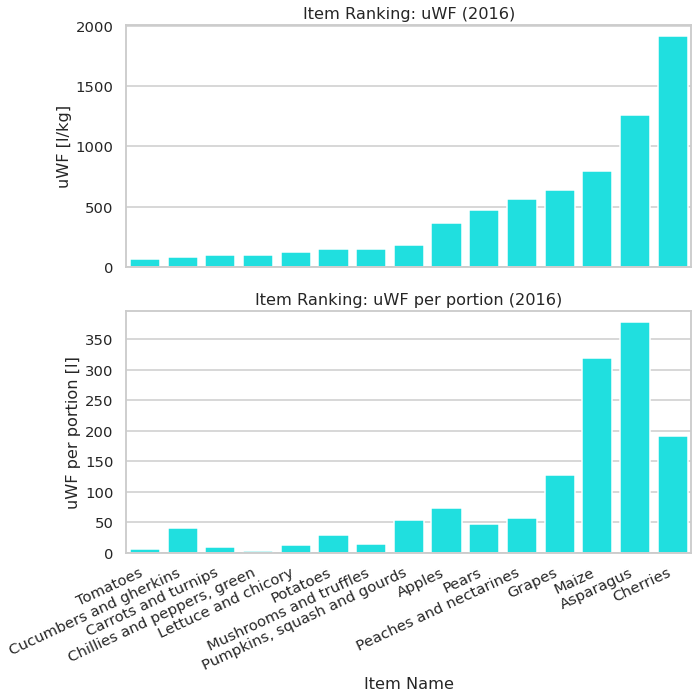

In [5]:
df_r_i16 = df.loc[df["Years"]==2016,["Item Name","uWF"]].groupby("Item Name").agg("mean").sort_values("uWF").round(1)
fig,ax = plt.subplots(2,figsize=[10,10])
ax[0] = sns.barplot(x=df_r_i16.index, y="uWF", data=df_r_i16,color="cyan",ax=ax[0]);
ax[0].set_xticklabels("");
ax[0].set(title="Item Ranking: uWF (2016)",xlabel="",ylabel="uWF [l/kg]")

df_r_i16["uWF_portion"]=df_r_i16["uWF"]*[0.1,0.5,0.1,0.03,0.1,0.2,0.1,0.3,0.2,0.1,0.1,0.2,0.4,0.3,0.1]
ax[1] = sns.barplot(x=df_r_i16.index, y="uWF_portion", data=df_r_i16,color="cyan",ax=ax[1]);
ax[1].set_xticklabels(df_r_i16.index,rotation=90,);
ax[1].set(title = "Item Ranking: uWF per portion (2016)", ylabel="uWF per portion [l]")
ax[1].set_xticklabels (ax[1].get_xticklabels(), rotation=25, horizontalalignment='right');

plt.tight_layout()
df_r_i16

### 3. Time-average uWF per country

,uWF
Country Name,
Belgium,204.176898
Netherlands,210.944920
Austria,298.117007
Italy,426.101775
France,436.493571
Germany,451.745404
Turkey,459.416443
Poland,476.506138
Greece,558.893227


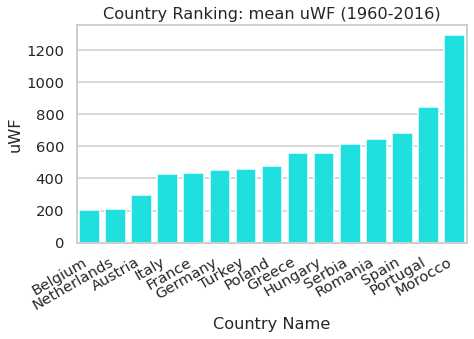

In [6]:
df_r_c = df.loc[:,["Country Name","uWF"]].groupby("Country Name").agg("mean").sort_values("uWF")
fig,ax = plt.subplots(figsize=[7,4])
ax = sns.barplot(x=df_r_c.index, y="uWF", data=df_r_c,color="cyan");
ax.set_xticklabels(df_r_c.index,rotation=90);
ax.set_title("Country Ranking: mean uWF (1960-2016)")
ax.set_xticklabels (ax.get_xticklabels(), rotation=30, horizontalalignment='right');

df_r_c

### 4. uWF per country in 2016

,uWF
Country Name,
Netherlands,140.467468
Belgium,224.733528
Turkey,288.150380
France,342.681313
Austria,350.913911
Italy,394.936249
Romania,397.469646
Poland,400.341575
Germany,406.704913


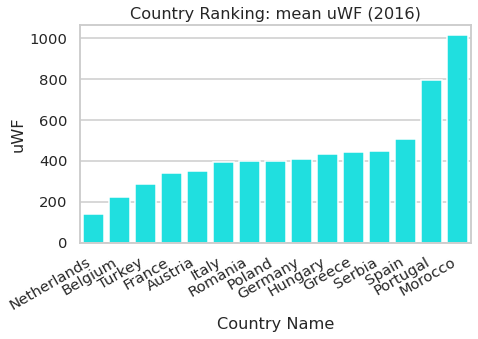

In [7]:
df_r_c16 = df.loc[df["Years"]==2016,["Country Name","uWF"]].groupby("Country Name").agg("mean").sort_values("uWF")
fig,ax = plt.subplots(figsize=[7,4])
ax = sns.barplot(x=df_r_c16.index, y="uWF", data=df_r_c16,color="cyan");
ax.set_xticklabels(df_r_c16.index,rotation=90);
ax.set_title("Country Ranking: mean uWF (2016)")
ax.set_xticklabels (ax.get_xticklabels(), rotation=30, horizontalalignment='right');

df_r_c16

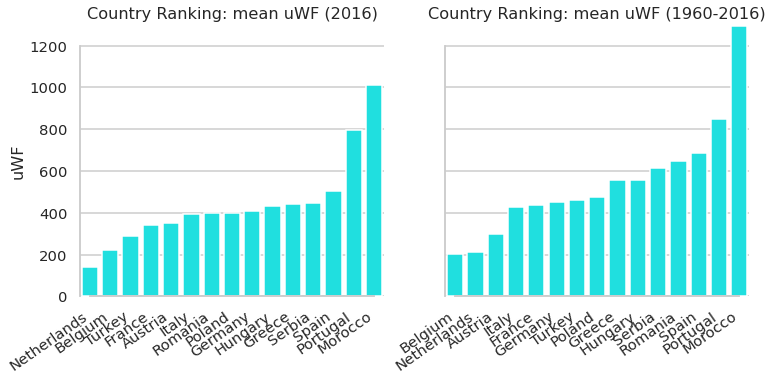

In [8]:
fig,ax = plt.subplots(1,2,figsize=[12,5])
sns.barplot(x=df_r_c16.index, y="uWF", data=df_r_c16,color="cyan",ax=ax[0],);
ax[0].set_xticklabels(df_r_c16.index,rotation=90);
ax[0].set_title("Country Ranking: mean uWF (2016)")
ax[0].set_xticklabels (ax[0].get_xticklabels(), rotation=35, horizontalalignment='right');
ax[0].set_ylim([0,1300]);
ax[0].set_xlabel("") 

ax[1] = sns.barplot(x=df_r_c.index, y="uWF", data=df_r_c,color="cyan");
ax[1].set_xticklabels(df_r_c.index,rotation=90);
ax[1].set_title("Country Ranking: mean uWF (1960-2016)")
ax[1].set_xticklabels (ax[1].get_xticklabels(), rotation=35, horizontalalignment='right');
ax[1].set_yticklabels("") 
ax[1].set_ylabel("") 
ax[1].set_xlabel("") 
ax[1].set_ylim([0,1300]);
sns.despine(trim=True)
#plt.tight_layout()